In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Yogesh Upadhyay\anaconda3\envs\TensorFlow-GPU\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [6]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [7]:
train = train.drop(['pet_id','issue_date','listing_date'],axis =1)
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [8]:
train.corr()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


In [9]:
train.dtypes

condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder to convert the color (categorical variables) to numeric trainable values

le = LabelEncoder()
train['color_type'] = le.fit_transform(train['color_type'])
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,NaN,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


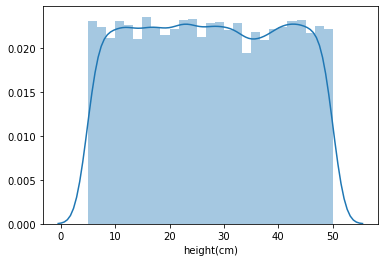

In [11]:
sns.distplot(train['height(cm)'])

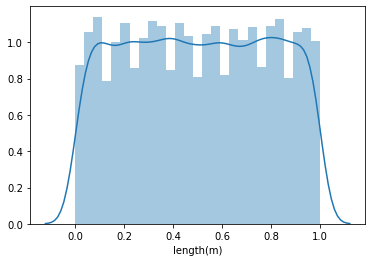

In [12]:
sns.distplot(train['length(m)'])

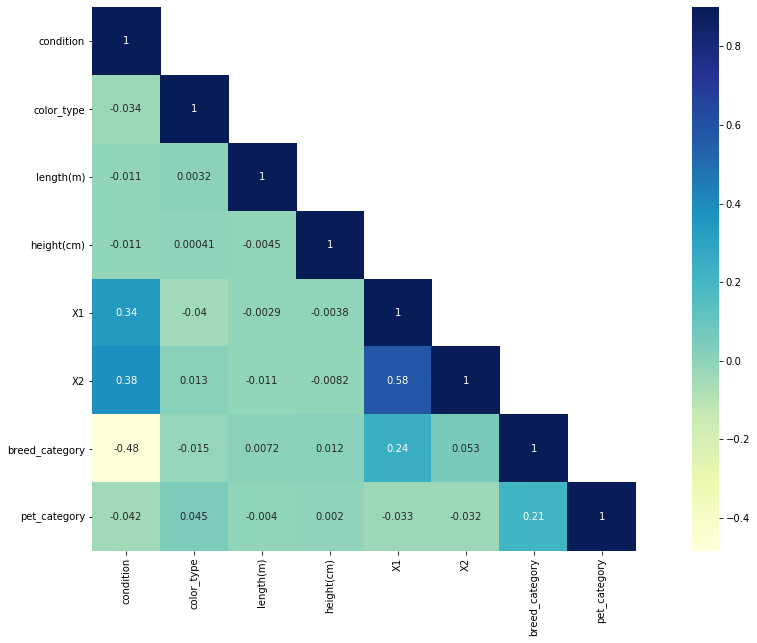

In [13]:
#Correlation between the values
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [14]:
train.isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [15]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,NaN,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


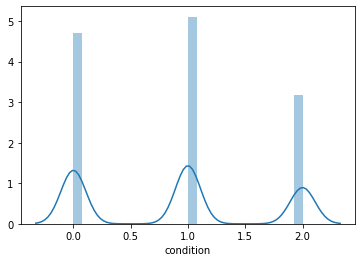

In [16]:
sns.distplot(train["condition"])

In [17]:
train['condition'].mode()

0    1.0
dtype: float64

In [18]:
train['condition'] = train['condition'].fillna(1)

In [19]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1
1,1.0,53,0.72,14.19,13,9,0.0,2
2,1.0,15,0.15,40.90,15,4,2.0,4
3,1.0,53,0.62,17.82,0,1,0.0,2
4,2.0,2,0.50,11.06,18,4,0.0,1


In [20]:
train.isnull().sum()

condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [21]:
X = np.array(train.iloc[:,0:6])
Y = train.iloc[:,6:]
X.shape,Y.shape

((18834, 6), (18834, 2))

In [22]:
Y.head()

,breed_category,pet_category
0,0.0,1
1,0.0,2
2,2.0,4
3,0.0,2
4,0.0,1


In [23]:
Y_BC = Y['breed_category']
Y_PC = Y['pet_category']

In [24]:
from sklearn.model_selection import train_test_split

x_train_bc,x_test_bc,y_train_bc,y_test_bc = train_test_split(X,Y_BC,test_size = 0.2,random_state = 0)

In [25]:
x_train_pc,x_test_pc,y_train_pc,y_test_pc = train_test_split(X,Y_PC,test_size = 0.2,random_state = 0)

# Random Forest for inidvidual target

In [26]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = "entropy")
classifier.fit(x_train_bc, y_train_bc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pred_bc = classifier.predict(x_test_bc)
y_pred_bc

array([0., 1., 0., ..., 1., 2., 2.])

In [28]:
from sklearn.metrics import f1_score

s1 = f1_score(y_test_bc,y_pred_bc,average = 'weighted')
s1

0.8486717858506102

In [29]:
classifier = classifier.fit(x_train_pc,y_train_pc)

In [30]:
y_pred_pc = classifier.predict(x_test_pc)
y_pred_pc

array([2, 2, 1, ..., 1, 1, 4], dtype=int64)

In [31]:
s2 = f1_score(y_test_pc,y_pred_pc,average = 'weighted')
s2

0.8293762290800905

In [32]:
score = 100*(s1+s2)/2
score

83.90240074653504

# XGBoost Classifier

In [33]:
#XGBoost Classifier

from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(x_train_bc, y_train_bc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred_bc = classifier.predict(x_test_bc)
y_pred_bc

array([2., 1., 0., ..., 1., 2., 2.])

In [35]:
s1 = f1_score(y_test_bc,y_pred_bc,average = 'weighted')
s1

0.8599389379836263

In [36]:
classifier = XGBClassifier(max_depth = 4,n_estimators = 50)
classifier.fit(x_train_pc, y_train_pc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred_pc = classifier.predict(x_test_pc)
y_pred_pc

array([2, 2, 1, ..., 1, 1, 4], dtype=int64)

In [38]:
s2 = f1_score(y_test_pc,y_pred_pc,average = 'weighted')
s2

0.8636456809869664

In [39]:
score = 100*(s1+s2)/2
score

86.17923094852964

# Naive Bayes Classifier

In [40]:
# NaiveBayes Classifier

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_bc, y_train_bc)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred_bc = classifier.predict(x_test_bc)
y_pred_bc

array([2., 1., 0., ..., 1., 2., 2.])

In [42]:
s1 = f1_score(y_test_bc,y_pred_bc,average = 'weighted')
s1

0.6191847531072628

In [43]:
classifier.fit(x_train_pc, y_train_pc)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_pred_pc = classifier.predict(x_test_pc)
y_pred_pc

array([1, 2, 1, ..., 2, 1, 4], dtype=int64)

In [45]:
s2 = f1_score(y_test_pc,y_pred_pc,average = 'weighted')
s2

0.6380140249369908

In [46]:
score = 100*(s1+s2)/2
score

62.85993890221269

# Catboost Classifier

In [47]:
from catboost import Pool,CatBoostClassifier

train_dataset = Pool(data=x_train_bc,
                     label=y_train_bc,)

model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

model.fit(train_dataset)

0:	learn: 0.5070700	total: 151ms	remaining: 1.35s
1:	learn: 0.4052745	total: 159ms	remaining: 637ms
2:	learn: 0.3341889	total: 168ms	remaining: 392ms
3:	learn: 0.3082727	total: 176ms	remaining: 264ms
4:	learn: 0.2925866	total: 186ms	remaining: 186ms
5:	learn: 0.2857103	total: 195ms	remaining: 130ms
6:	learn: 0.2797276	total: 203ms	remaining: 87.1ms
7:	learn: 0.2690708	total: 211ms	remaining: 52.9ms
8:	learn: 0.2644432	total: 219ms	remaining: 24.4ms
9:	learn: 0.2626053	total: 227ms	remaining: 0us


In [51]:
y_pred_bc = model.predict(x_test_bc)
y_pred_bc = pd.DataFrame(y_pred_bc)
y_pred_bc.head()

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [53]:
s1 = f1_score(y_test_bc,y_pred_bc[0],average = 'weighted')
s1

0.8572313064171736

In [54]:
train_dataset = Pool(data=x_train_pc,
                     label=y_train_pc,)

model.fit(train_dataset)

0:	learn: 0.8367636	total: 6.63ms	remaining: 59.7ms
1:	learn: 0.7220535	total: 11.8ms	remaining: 47.3ms
2:	learn: 0.6326267	total: 16.5ms	remaining: 38.6ms
3:	learn: 0.5828918	total: 21.4ms	remaining: 32.1ms
4:	learn: 0.5510147	total: 26.1ms	remaining: 26.1ms
5:	learn: 0.5378904	total: 30.8ms	remaining: 20.5ms
6:	learn: 0.4933544	total: 35.7ms	remaining: 15.3ms
7:	learn: 0.4705498	total: 41.7ms	remaining: 10.4ms
8:	learn: 0.4563427	total: 46.9ms	remaining: 5.21ms
9:	learn: 0.4461348	total: 51.7ms	remaining: 0us


In [55]:
y_pred_pc = model.predict(x_test_pc)
y_pred_pc = pd.DataFrame(y_pred_pc)
y_pred_pc.head()

,0
0,2
1,2
2,1
3,2
4,2


In [56]:
s2 = f1_score(y_test_pc,y_pred_pc[0],average = 'weighted')
s2

0.8216979280827554